<a href="https://colab.research.google.com/github/mahfuz978/Regression-Classification/blob/main/Linear_Regression/Mahfuzur_Rahman_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please use the Seoul Bike dataset. 

- What are the factors that influence the number of bikes rented? 
- Explore the data for outliers and missing values.
- Plot the correlation between the variables and state your comments
- Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.
- Coment on Model performance by using approapriate diagnostics and measures.

Good Luck!

Importing the necessary libraries

---
Limiting how many rows can be seen




In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 400)

In [ ]:
# help(pd.read_csv)

Reading the csv file and indetifying the null values

In [ ]:
url = 'https://raw.githubusercontent.com/Tech-i-s/data-science-course-wiki/master/Step%203-1%20Linear%20Regression/Project/SeoulBikeData.csv?token=AM2M2N3JH2IYHR35LJHUOVTAEWVTY'
df = pd.read_csv(url, na_values= ' ?')

Creating a new id column using the index

In [ ]:
df['Id'] = df.index

Displaying the The first five rows of the dataset

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Id
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4


Importing the matplotlib library to visualize the rented bike count
and displaying the mean and median

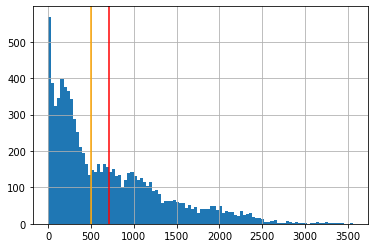

In [ ]:
import matplotlib.pyplot as plt

df['Rented Bike Count'].hist(bins = 100)
plt.axvline(df['Rented Bike Count'].mean(), color = 'red')
plt.axvline(df['Rented Bike Count'].median(), color = 'orange');

Calculating the root mean squared error

In [ ]:
guess = df['Rented Bike Count'].mean()
errors = guess - df['Rented Bike Count']
R_M_S_E = errors.abs().mean()
print(f'We will be off by {R_M_S_E:,.0f} on average')

We will be off by 520 on average


Looking for null values in the dataset

In [ ]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Id                          0
dtype: int64

Description of the numeric columns

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Id
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,4379.500000
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,2528.938512
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2189.750000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,4379.500000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,6569.250000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,8759.000000


Stats of the Non-Numeric Columns

In [ ]:
df.describe(exclude = 'number')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,12/11/2018,Summer,No Holiday,Yes
freq,24,2208,8328,8465


Information about each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
 14  Id      

Finding the unique values for (Seasons, Holiday and Functioning Day columns)

In [ ]:
x = set(df.Seasons)
y = set(df.Holiday)
z = set(df['Functioning Day'])
print(x)
print(y)
print(z)

{'Winter', 'Autumn', 'Summer', 'Spring'}
{'No Holiday', 'Holiday'}
{'Yes', 'No'}


Grouping the Rented bike count by seasons

In [ ]:
x = df[['Rented Bike Count','Seasons']]
x = x.groupby('Seasons').sum()
x.head()

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


Counting the Values for each Season

In [ ]:
df['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

Grouping the Rented bike count by holiday

In [ ]:
x = df[['Rented Bike Count','Holiday']]
x = x.groupby('Holiday').sum()
x.head()

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


Using pandas crosstab to plot and visualize how the bikes were rented during holidays and a regular business days, and each bar representing a season

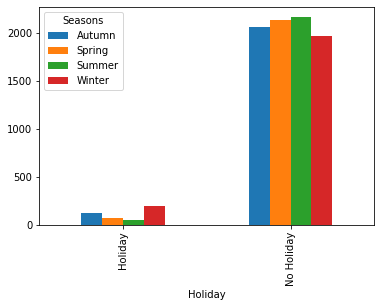

In [ ]:
pd.crosstab(df['Seasons'], df['Holiday']).T.plot(kind = 'bar', stacked = False);


Grouping the rented bike count by Functioning day

In [ ]:
x = df[['Rented Bike Count','Functioning Day']]
x = x.groupby('Functioning Day').sum()
x.head()

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


Now that we know more about the dataset, we can exclude some rows that are unnesessary. The code below only keeps all the functioning days and keeps the business days. Thus we can reduse noise and focus on whats important.

In [ ]:
df = df[df['Functioning Day']=='Yes']
df = df[df['Holiday']=='No Holiday']

The code below gets rid of all the non-numeric columns

In [ ]:
df = df.select_dtypes(include = ['int64', 'float64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Id
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4


In [ ]:
df.isnull().sum()

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Id                          0
dtype: int64

We are randomly splitting the updated dataset into test and train set

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.30)

Checking the size of the sets

In [ ]:
train.shape

(5639, 11)

In [ ]:
test.shape

(2418, 11)

Looking at the correlation table

In [ ]:
data_corr = train.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Id
Rented Bike Count,1.000000,0.438274,0.552173,-0.213094,0.121834,0.223890,0.388431,0.269496,-0.130012,-0.152674,0.385692
Hour,0.438274,1.000000,0.123896,-0.242656,0.291002,0.117054,0.003642,0.151203,0.015002,-0.025099,0.007836
Temperature(C),0.552173,0.123896,1.000000,0.159345,-0.040512,0.041779,0.914406,0.351808,0.049587,-0.217617,0.573158
Humidity(%),-0.213094,-0.242656,0.159345,1.000000,-0.325728,-0.534647,0.534369,-0.458804,0.234570,0.113030,0.172143
Wind speed (m/s),0.121834,0.291002,-0.040512,-0.325728,1.000000,0.191697,-0.173101,0.312755,-0.021349,0.005675,-0.154623
Visibility (10m),0.223890,0.117054,0.041779,-0.534647,0.191697,1.000000,-0.165438,0.159086,-0.160167,-0.121035,0.107358
Dew point temperature(C),0.388431,0.003642,0.914406,0.534369,-0.173101,-0.165438,1.000000,0.097789,0.123801,-0.149916,0.559089
Solar Radiation (MJ/m2),0.269496,0.151203,0.351808,-0.458804,0.312755,0.159086,0.097789,1.000000,-0.073333,-0.071504,0.092326
Rainfall(mm),-0.130012,0.015002,0.049587,0.234570,-0.021349,-0.160167,0.123801,-0.073333,1.000000,0.022533,0.041033
Snowfall (cm),-0.152674,-0.025099,-0.217617,0.113030,0.005675,-0.121035,-0.149916,-0.071504,0.022533,1.000000,-0.120074


The code below calculates how all the columns are correlated to the rented bike count and displays only the ones that has a correlation of .30 or more

In [ ]:
data_corr = data_corr['Rented Bike Count'][1:]
data_corr[abs(data_corr)>=0.30].sort_values(ascending=False)

Temperature(C)              0.552173
Hour                        0.438274
Dew point temperature(C)    0.388431
Id                          0.385692
Name: Rented Bike Count, dtype: float64

Since temperature has the highest correlation I decided to use it for the model

In [ ]:
df_train = train[['Temperature(C)', 'Rented Bike Count']]
df_test = test[['Temperature(C)']]

I used plotly to visualize the linear realtionship between temperature and the rented bike count


In [ ]:
import plotly.express as px
fig = px.scatter(df_train, x = 'Temperature(C)', y = 'Rented Bike Count', trendline = 'ols' )
fig.show();

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



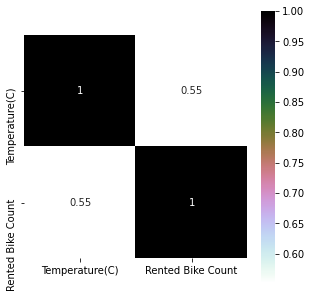

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_train.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

Using the training set im creating another training and a validation set 

In [ ]:
train, val = train_test_split(df_train, test_size=0.30)

By seperating using x and y's  I created 4 dataframes

In [ ]:
train_x = train.drop('Rented Bike Count', axis=1)
train_y = train['Rented Bike Count']

In [ ]:
val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (3947, 1)
Dimension of train_y dataframe: (3947,)
Dimension of val_x dataframe: (1692, 1)
Dimension of val_y dataframe: (1692,)


Importing Linear Regression to train the model to make prediction

In [ ]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Using sklearn.metrics calculate the errors

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 392.132658784941
Mean Square Error of linear regression: 274944.9055614645
R_Squared Score of linear regression: -1.1272560455477127


Now use the model to predict the test set

In [ ]:
predict_test = ln_reg.predict(df_test)
predict_test

array([638.46311974, 950.47738534, 891.60676919, ..., 341.16650818,
       685.55961266, 349.9971006 ])

In [ ]:
test.columns


Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Id'],
      dtype='object')

In [ ]:
submission_data = pd.DataFrame({"Id": test.Id , 'Pred_Bike_Count':predict_test})

submission_data['Actual_bikes_Rented']= test['Rented Bike Count']
df = submission_data.head(30).sort_values(by = 'Id')

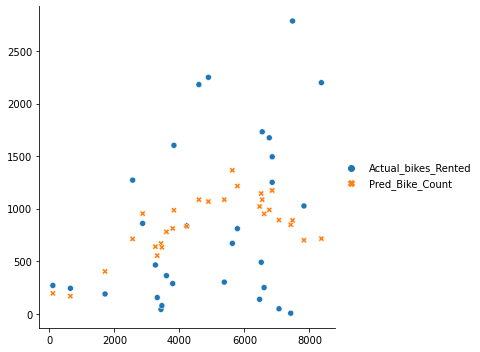

In [ ]:
'''
1) What are the factors that influence the number of bikes rented? 

Ans: The factors that influenced the influenced the number of bikes rented is 
[Temperature(C), Hour, Dew point temperature(C)].

2) Explore the data for outliers and missing values.

There are no missing values in this dataset, and no absolute outliers.

3) Plot the correlation between the variables and state your comments

Temperature has a very stong correlation with the number of bikes rented.

4) Please build a linear regression model to predict rented bike count by 
choosing appropriate independentvariables.
5) Coment on Model performance by using approapriate diagnostics and measures.

The model didn't perform very well because the data is very spread out thus
giving us a very high mean squared error.
'''
df = df[['Actual_bikes_Rented', 'Pred_Bike_Count']]
import matplotlib.pyplot as plt
import seaborn as sns
sns.relplot(
    data=df,
);